In [2]:
import pandas as pd

# Load the dataset to review its contents and structure
file_path = 'athletes_data.csv'
athletes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for inspection
athletes_data.head()



,Name,MainContent,BioMedals,BiographicalInformation,Milestones
0,ABREU Isabela,ABREU Isabela \r\nBrazil\r\nModern Pentathlon\...,EVENTS AND MEDALS\r\nDiscipline\r\nEvent\r\nRa...,BIOGRAPHICAL INFORMATION\r\nHighlights:\r\nNot...,MILESTONES\r\n2019 Pan American Games modern p...
1,ADRIANA,ADRIANA \r\nBrazil\r\nFootball\r\nFootball\r\...,EVENTS AND MEDALS\r\nDiscipline\r\nEvent\r\nRa...,BIOGRAPHICAL INFORMATION\r\nHighlights:\r\nFIF...,MILESTONES\r\nNATIONAL TEAM\r\nCompeted in 202...
2,AGUIAR Mayra,AGUIAR Mayra \r\nBrazil\r\nJudo\r\nJudo\r\nDat...,EVENTS AND MEDALS\r\nDiscipline\r\nEvent\r\nRa...,BIOGRAPHICAL INFORMATION\r\nHighlights:\r\nOly...,MILESTONES\r\nThree-time Olympic Games bronze ...
3,AKIO Augusto,AKIO Augusto \r\nBrazil\r\nSkateboarding\r\nSk...,EVENTS AND MEDALS\r\nDiscipline\r\nEvent\r\nRa...,BIOGRAPHICAL INFORMATION\r\nHighlights:\r\nWor...,MILESTONES\r\nSilver medallist at the 2022 Wor...
4,ALBIERO Nicolas,ALBIERO Nicolas \r\nBrazil\r\nSwimming\r\nSwim...,EVENTS AND MEDALS\r\nDiscipline\r\nEvent\r\nRa...,BIOGRAPHICAL INFORMATION\r\nHighlights:\r\nNot...,MILESTONES\r\nFirst-time Olympian.\r\n2017 Wor...


In [3]:
import re

# Function to clean text data by removing unwanted characters, extra spaces, and line breaks
def clean_text(text):
    text = re.sub(r'\n+', ' ', text)  # Replace newlines with spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^a-zA-Z0-9À-ÿ., ]+', '', text)  # Remove non-alphanumeric characters except periods and commas
    return text.strip()

# Applying the cleaning function to relevant columns
columns_to_clean = ['MainContent', 'BioMedals', 'BiographicalInformation', 'Milestones']
# Ensuring that all columns are strings by replacing any NaN values with an empty string
athletes_data[columns_to_clean] = athletes_data[columns_to_clean].fillna("")

# Reapplying the cleaning function to ensure all text is processed correctly
for column in columns_to_clean:
    athletes_data[column] = athletes_data[column].apply(clean_text)

athletes_data

,Name,MainContent,BioMedals,BiographicalInformation,Milestones
0,ABREU Isabela,ABREU Isabela Brazil Modern Pentathlon Modern ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Note Resul...,MILESTONES 2019 Pan American Games modern pent...
1,ADRIANA,ADRIANA Brazil Football Football Date of Birth...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights FIFA World...,MILESTONES NATIONAL TEAM Competed in 2023 FIFA...
2,AGUIAR Mayra,AGUIAR Mayra Brazil Judo Judo Date of Birth 3 ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Threetime Olympic Games bronze meda...
3,AKIO Augusto,AKIO Augusto Brazil Skateboarding Skateboardin...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights World Cham...,MILESTONES Silver medallist at the 2022 World ...
4,ALBIERO Nicolas,ALBIERO Nicolas Brazil Swimming Swimming Date ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Note Resul...,MILESTONES Firsttime Olympian. 2017 World Juni...
...,...,...,...,...,...
285,VIEIRA Samara,VIEIRA Samara Brazil Handball Handball Date of...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Made her Olympic debut at Tokyo 202...
286,VILAR Lucas,VILAR Lucas Brazil Athletics Athletics Date of...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Competed in the 200m heats at the T...
287,VITORIA YAYA,VITORIA YAYA Brazil Football Football Date of ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Note Resul...,MILESTONES NATIONAL TEAM Won the CONCACAF Gold...
288,WESTON-WEBB Tatiana,WESTONWEBB Tatiana Brazil Surfing Surfing Date...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Made her Olympic debut at Tokyo 202...


In [6]:
from sentence_transformers import SentenceTransformer
import torch

# Initialize the SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Combine the relevant columns for each athlete to create a single text input
athletes_data['combined_text'] = athletes_data['MainContent'] + " " + \
                                 athletes_data['BioMedals'] + " " + \
                                 athletes_data['BiographicalInformation'] + " " + \
                                 athletes_data['Milestones']

# Generate embeddings for each combined text using SBERT
embeddings = model.encode(athletes_data['combined_text'].tolist(), convert_to_tensor=True)


C:\Users\rafae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
C:\Users\rafae\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rafae\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either

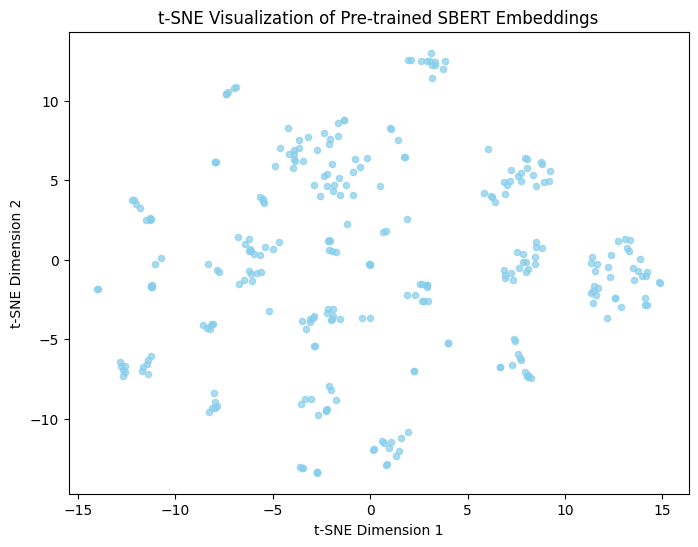

In [7]:
# Generate and visualize t-SNE for only the pre-trained embeddings
# Assuming `embeddings` contains the pre-trained SBERT embeddings

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate 2D t-SNE projection for pre-trained SBERT embeddings
pretrained_tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(pretrained_tsne[:, 0], pretrained_tsne[:, 1], s=20, alpha=0.7, color='skyblue')
plt.title("t-SNE Visualization of Pre-trained SBERT Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define Autoencoder Model
class EmbeddingAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(EmbeddingAutoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)
        
    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        decoded = self.decoder(encoded)
        return decoded, encoded

# Set dimensions (adjust based on your model’s output embedding size)
input_dim = embeddings.shape[1]  # Typically 384 for MiniLM models
hidden_dim = 128  # Reduced dimensionality for fine-tuning

# Initialize the model, optimizer, and loss function
autoencoder = EmbeddingAutoencoder(input_dim, hidden_dim)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Convert embeddings to a PyTorch tensor
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)

# Training Loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    decoded, encoded = autoencoder(embeddings_tensor)
    loss = criterion(decoded, embeddings_tensor)  # Reconstruction loss
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Extract the fine-tuned embeddings
fine_tuned_embeddings = encoded.detach().numpy()


Epoch 1/10, Loss: 0.07004871219396591
Epoch 2/10, Loss: 0.06363629549741745
Epoch 3/10, Loss: 0.05867559462785721
Epoch 4/10, Loss: 0.05417344719171524
Epoch 5/10, Loss: 0.049727968871593475
Epoch 6/10, Loss: 0.04548250883817673
Epoch 7/10, Loss: 0.04166508466005325
Epoch 8/10, Loss: 0.03830712288618088
Epoch 9/10, Loss: 0.03527577593922615
Epoch 10/10, Loss: 0.03249754011631012


C:\Users\rafae\AppData\Local\Temp\ipykernel_10440\1080324033.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)


In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
embeddings_2d = tsne.fit_transform(fine_tuned_embeddings)


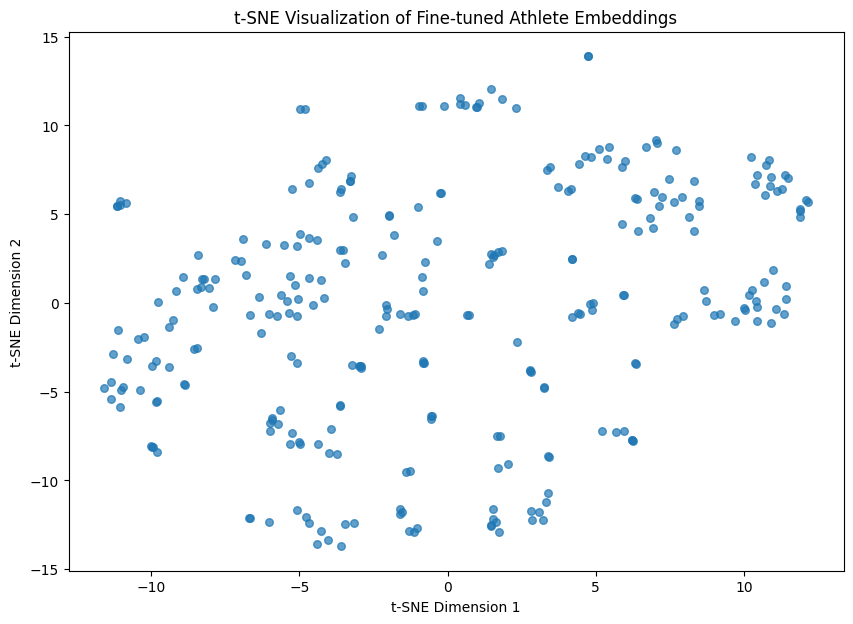

In [10]:
# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=30, alpha=0.7)

# Optionally, add labels or a color scheme if you have categories (e.g., sport type)
plt.title("t-SNE Visualization of Fine-tuned Athlete Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [11]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 5  # You can adjust this based on your data and visualization

# Initialize and fit K-Means on the 2D embeddings
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_2d)

# Add the cluster labels to your data for easy analysis
athletes_data['Cluster'] = cluster_labels


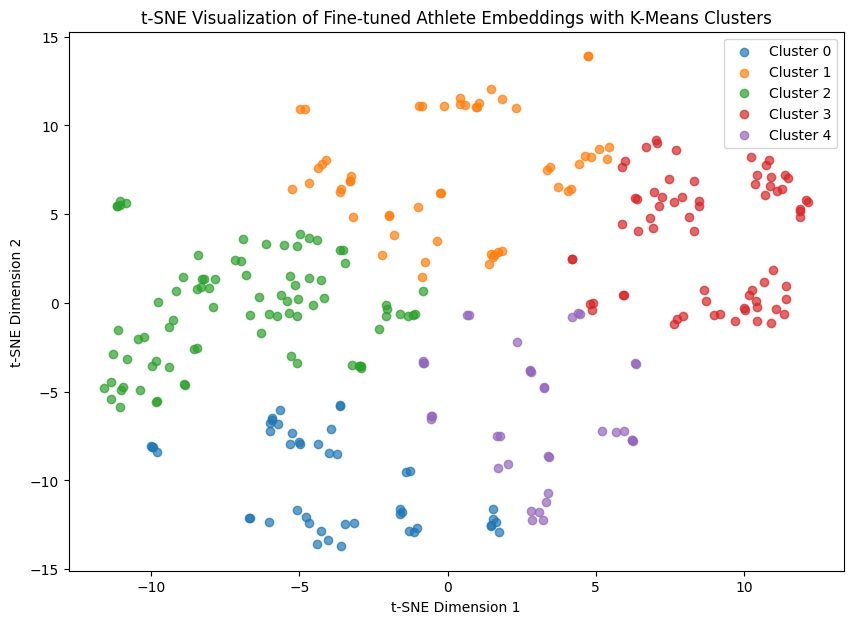

In [12]:
import matplotlib.pyplot as plt

# Create a scatter plot with clusters
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    # Filter data points for the current cluster
    cluster_points = embeddings_2d[athletes_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.legend(loc='best')
plt.title("t-SNE Visualization of Fine-tuned Athlete Embeddings with K-Means Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Increase max_features to get more keywords per cluster
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Extract and display top keywords for each cluster
for cluster in range(n_clusters):
    cluster_texts = athletes_data[athletes_data['Cluster'] == cluster]['combined_text']
    tfidf_matrix = vectorizer.fit_transform(cluster_texts)
    top_keywords = vectorizer.get_feature_names_out()
    print(f"\nCluster {cluster} Top Keywords: {top_keywords}")




Cluster 0 Top Keywords: ['2022' '2023' '2024' 'athlete' 'birth' 'bra' 'brazil' 'country' 'event'
 'events' 'games' 'kg' 'location' 'medallist' 'mens' 'olympic' 'rank'
 'womens' 'world' 'year']

Cluster 1 Top Keywords: ['2021' '2022' '2023' 'age' 'athlete' 'birth' 'bra' 'brazil'
 'championships' 'event' 'events' 'games' 'location' 'men' 'olympic'
 'rank' 'team' 'womens' 'world' 'year']

Cluster 2 Top Keywords: ['2021' '2022' '2023' 'american' 'athlete' 'birth' 'bra' 'brazil'
 'championships' 'event' 'freestyle' 'games' 'medallist' 'mens' 'olympic'
 'rank' 'relay' 'womens' 'world' 'year']

Cluster 3 Top Keywords: ['2023' 'age' 'athlete' 'birth' 'bra' 'brazil' 'club' 'country' 'cup'
 'event' 'events' 'league' 'location' 'national' 'olympic' 'rank'
 'volleyball' 'women' 'world' 'year']

Cluster 4 Top Keywords: ['2021' '2022' '2023' '2024' 'age' 'birth' 'bra' 'brazil' 'doubles'
 'event' 'games' 'mens' 'olympic' 'rank' 'rio' 'singles' 'tennis' 'womens'
 'world' 'year']


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Increase max_features to get more keywords per cluster
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Extract and display top keywords for each cluster
for cluster in range(n_clusters):
    cluster_texts = athletes_data[athletes_data['Cluster'] == cluster]['MainContent']
    tfidf_matrix = vectorizer.fit_transform(cluster_texts)
    top_keywords = vectorizer.get_feature_names_out()
    print(f"\nCluster {cluster} Top Keywords: {top_keywords}")


Cluster 0 Top Keywords: ['age' 'athlete' 'birth' 'brazil' 'country' 'date' 'female' 'function'
 'gender' 'janeiro' 'judo' 'male' 'paulo' 'place' 'porto' 'residence'
 'sailing' 'sao' 'skateboarding' 'surfing']

Cluster 1 Top Keywords: ['age' 'athlete' 'basketball' 'birth' 'boxing' 'brazil' 'country' 'date'
 'female' 'ft' 'function' 'gender' 'gymnastics' 'height' 'male' 'place'
 'residence' 'rhythmic' 'sao' 'volleyball']

Cluster 2 Top Keywords: ['age' 'athlete' 'athletics' 'birth' 'brazil' 'country' 'date'
 'equestrian' 'female' 'ft' 'function' 'gender' 'height' 'male' 'paulo'
 'place' 'residence' 'rio' 'sao' 'swimming']

Cluster 3 Top Keywords: ['27' 'age' 'athlete' 'birth' 'brazil' 'country' 'date' 'female'
 'football' 'ft' 'function' 'gender' 'handball' 'height' 'paulo' 'place'
 'residence' 'sao' 'spain' 'volleyball']

Cluster 4 Top Keywords: ['age' 'athlete' 'birth' 'brazil' 'country' 'cycling' 'date' 'female' 'ft'
 'function' 'gender' 'height' 'janeiro' 'male' 'place' 'residence' 

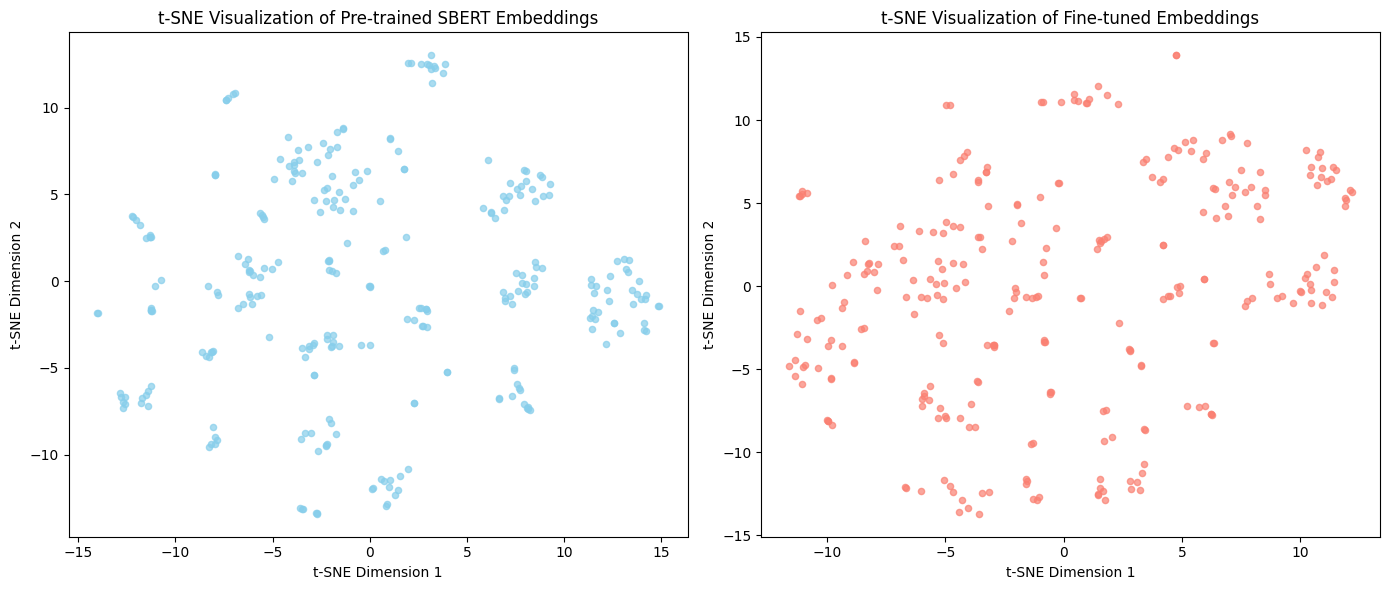

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming `embeddings` contains pre-trained SBERT embeddings
# and `fine_tuned_embeddings` contains embeddings after fine-tuning

# Step 1: Generate 2D t-SNE embeddings
pretrained_tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(embeddings)
tuned_tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(fine_tuned_embeddings)

# Step 2: Visualize both embeddings
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot pre-trained embeddings
ax[0].scatter(pretrained_tsne[:, 0], pretrained_tsne[:, 1], s=20, alpha=0.7, color='skyblue')
ax[0].set_title("t-SNE Visualization of Pre-trained SBERT Embeddings")
ax[0].set_xlabel("t-SNE Dimension 1")
ax[0].set_ylabel("t-SNE Dimension 2")

# Plot fine-tuned embeddings
ax[1].scatter(tuned_tsne[:, 0], tuned_tsne[:, 1], s=20, alpha=0.7, color='salmon')
ax[1].set_title("t-SNE Visualization of Fine-tuned Embeddings")
ax[1].set_xlabel("t-SNE Dimension 1")
ax[1].set_ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()



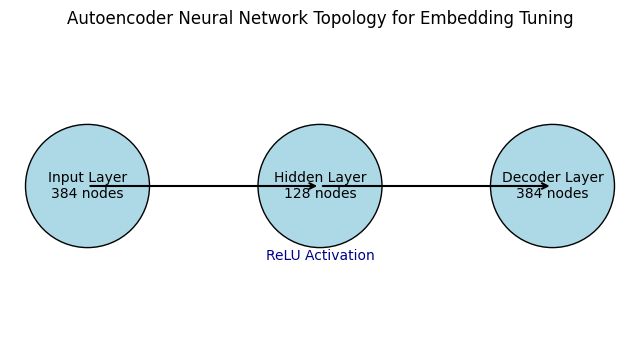

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Define layer positions and sizes
layers = [
    {"name": "Input Layer", "size": 384, "position": (1, 2)},
    {"name": "Hidden Layer", "size": 128, "position": (4, 2)},
    {"name": "Decoder Layer", "size": 384, "position": (7, 2)}
]

# Draw layers as circles
for layer in layers:
    ax.add_patch(mpatches.Circle(layer["position"], 0.8, edgecolor="black", facecolor="lightblue"))
    ax.text(*layer["position"], f'{layer["name"]}\n{layer["size"]} nodes', ha='center', va='center', fontsize=10)

# Draw arrows to indicate flow
for i in range(len(layers) - 1):
    ax.annotate('', xy=layers[i + 1]["position"], xytext=layers[i]["position"],
                arrowprops=dict(arrowstyle="->", lw=1.5))

# Label activation function for the hidden layer
ax.text(4, 1.1, "ReLU Activation", ha='center', va='center', fontsize=10, color="darkblue")

# Set plot limits and remove axes
ax.set_xlim(0, 8)
ax.set_ylim(0, 4)
ax.axis('off')

# Title and display
plt.title("Autoencoder Neural Network Topology for Embedding Tuning")
plt.show()


In [17]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy as np
import pandas as pd


# Definir a função de busca semântica usando embeddings ajustados
def semantic_search(query, top_n=10, threshold=0.2):
    # Passo 1: Gerar embedding da consulta com o modelo SBERT
    query_embedding = model.encode([query])
    
    # Passo 2: Reduzir a dimensionalidade do embedding da consulta com o encoder do autoencoder
    query_embedding_tensor = torch.tensor(query_embedding).float()
    query_embedding_reduced = autoencoder.encoder(query_embedding_tensor)  # Corrigido para receber apenas um valor
    query_embedding_reduced = query_embedding_reduced.detach().numpy()
    
    # Passo 3: Calcular similaridade de cosseno entre a consulta e os embeddings ajustados dos documentos
    similarities = cosine_similarity(query_embedding_reduced, fine_tuned_embeddings).flatten()
    
    # Passo 4: Filtrar resultados com base no limiar de similaridade e ordenar
    athletes_data['Similarity'] = similarities
    filtered_results = athletes_data[athletes_data['Similarity'] > threshold]
    sorted_results = filtered_results.sort_values(by='Similarity', ascending=False)

    
    # Passo 6: Determinar o número de resultados finais e limitar a quantidade
    final_results = sorted_results[['Name', 'Similarity']].head(min(top_n, len(sorted_results)))
    result_count = len(final_results)
    
    # Exibir a quantidade de resultados e os resultados
    print(f"Quantidade de resultados: {result_count}")
    return final_results

# Consultas de exemplo para testar o sistema de busca
query_10_results = "Flamengo"
query_less_than_10_results = "Bahia"
query_non_obvious = "Patricia"

# Executar os testes
results_10 = semantic_search(query_10_results)
results_few = semantic_search(query_less_than_10_results, top_n=10, threshold=0.5)
results_non_obvious = semantic_search(query_non_obvious)

# Exibir os resultados para cada consulta
print("\nResultados para a consulta (10 resultados):")
print(results_10)

print("\nResultados para a consulta (menos de 10 resultados):")
print(results_few)

print("\nResultados para a consulta não óbvia:")
print(results_non_obvious)

Quantidade de resultados: 10
Quantidade de resultados: 0
Quantidade de resultados: 10

Resultados para a consulta (10 resultados):
                                     Name  Similarity
131                    HUERTAS Marcelinho    0.320205
101      FERNANDES P.X.CAVALCANTE Adriano    0.318397
217  RODRIGUES FERNANDES Henrique Marques    0.314278
227                            SANTOS Gui    0.313562
146                          LIMA Willian    0.311679
96                 DUARTE HADDAD Henrique    0.311325
187                             NETO Raul    0.309270
259                   SOUTA Vagner Junior    0.309248
85                             DIAS Lucas    0.308722
180                       MONTEIRO Thiago    0.307316

Resultados para a consulta (menos de 10 resultados):
Empty DataFrame
Columns: [Name, Similarity]
Index: []

Resultados para a consulta não óbvia:
                               Name  Similarity
32                              NaN    0.381161
148                             